$$
\frac{Q_1}{\lambda \kappa}
=   \left|\frac{ { 4}/{\sqrt{3} 
}}{
\sum_{k=1}^2 
k
\,
d^{(2)}_{k,0}(\theta_M)
\displaystyle \frac{r_{2,k}'(\alpha,\beta) }{3 \zeta_q}}\right|.
$$
where
$$|r'_{2,k}(\alpha,\beta) |^2 = R'_{2,k} R^{\prime *}_{2,k}$$
and
$$R'_{2,k}
= 
e^{-i k \gamma}
\sum_{n=-2}^2 
e^{-i n \alpha} d_{n,k}^{(2)}(\beta) 
\,
\rho_{2,n},
$$
and
$$\rho_{2,0}=  \sqrt{\frac{3}{2}}~\zeta_q, ~~~~
\rho_{2,\pm 1} = 0, ~~~~
\rho_{2,\pm 2} = - \eta_q \zeta_q/2.
$$

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import spinOps
from matplotlib import cm
from matplotlib.cm import ScalarMappable
from matplotlib import gridspec

plt.rcParams.update({'font.size': 10})
plt.rcParams['pdf.fonttype'] = 42



In [16]:
# Define the range of alpha and beta values
alpha_values = np.linspace(0,np.pi, 100)  
beta_values = np.linspace(0, np.pi/2, 250)  # Range of latitudes

# Create a grid of alpha and beta values
alpha_grid, beta_grid = np.meshgrid(alpha_values, beta_values)

# Define a list of eta values
eta_values = np.arange(0, 1.1, 0.25)


In [17]:
from math import acos, sqrt

theta_M = acos(1/sqrt(3))
factor1 = spinOps.wigner_d(2, 1, 0, theta_M)
factor2 = spinOps.wigner_d(2, 2, 0, theta_M)

In [18]:
# Initialize a list to store all magnitudes and arguments
all_Qs = []
all_Denominators = []

# Loop over each eta value
for eta in eta_values:
    input = spinOps.createRho2(1, eta)

    # Initialize an empty array to store the magnitudes and arguments
    magnitudes = np.zeros((beta_values.size, alpha_values.size, len(input)))
    Qs = np.zeros((beta_values.size, alpha_values.size))
    denominators = np.zeros((beta_values.size, alpha_values.size))

    # Loop over each alpha and beta value
    for i in range(alpha_values.size):
        for j in range(beta_values.size):
            output = spinOps.Rotate(input, alpha_values[i], beta_values[j], 0)
            magnitude = np.abs(output)
            
            denominator = np.abs(factor1* magnitude[3]/3 
            + 2*factor2*magnitude[4]/3)
            denominators[j, i] = denominator
            
            Q = 2.309401076758503 / denominator
            Qs[j, i] = Q
            

    all_Qs.append(Qs)
    all_Denominators.append(denominators)


/var/folders/bh/ml113xw9279gp290p_k6njy00000gn/T/ipykernel_38141/3544152066.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  Q = 2.309401076758503 / denominator


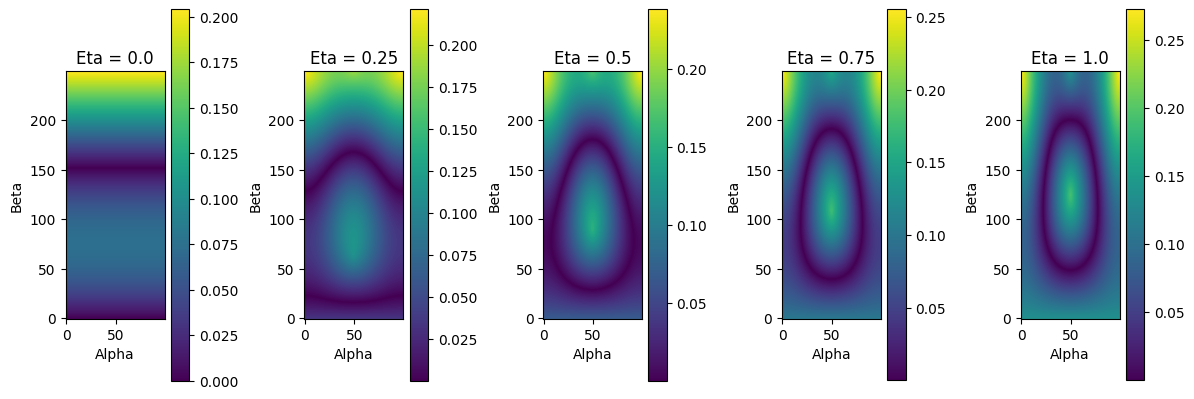

In [19]:
# Create a figure with a grid of subplots
fig = plt.figure(figsize=(12, 5))  # Increase the width of the figure
gs = gridspec.GridSpec(1, len(eta_values), figure=fig)

# Loop over each eta value
for i, (eta, denominators) in enumerate(zip(eta_values, all_Denominators)):
    # Create a subplot in the grid
    ax = fig.add_subplot(gs[0, i])

    # Plot the denominators as an image plot
    im = ax.imshow(denominators, cmap='viridis', origin='lower')

    # Set the title of the plot to the current eta value
    ax.set_title(f'Eta = {eta}')

    # Add labels to the plot axes
    ax.set_xlabel('Alpha')
    ax.set_ylabel('Beta')

    # Add colorbar
    cbar = fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()


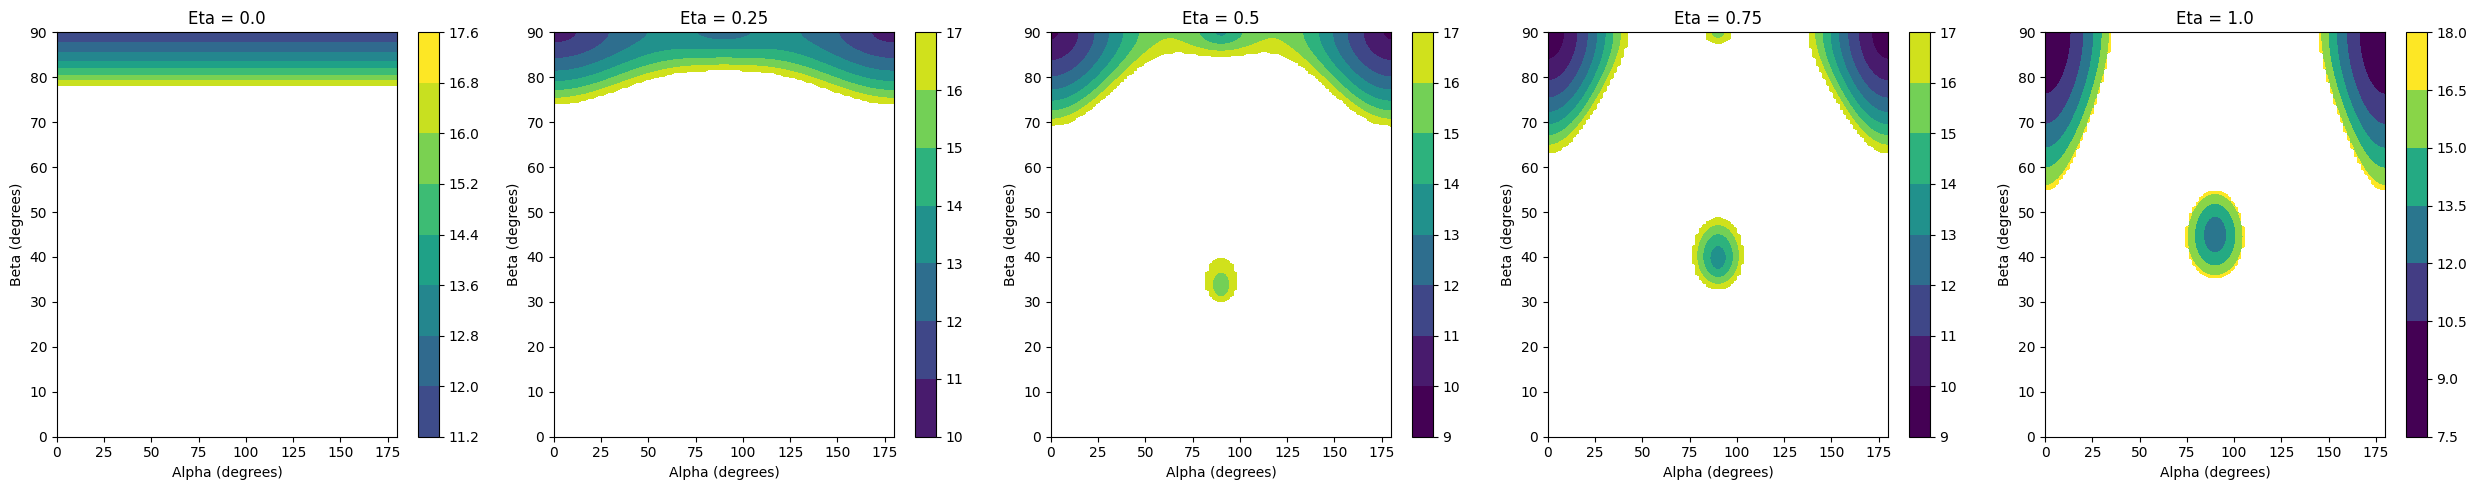

In [20]:
# Convert alpha and beta to degrees
alpha_degrees = np.degrees(alpha_grid)
beta_degrees = np.degrees(beta_grid)

# Create a 2D contour plot for each eta
fig, axs = plt.subplots(1,len(eta_values), figsize=(5*len(eta_values),5))

for ax, eta, selected_Qs in zip(axs, eta_values, all_Qs):
    # Filter the Q values that are below 1
    filtered_Qs = np.ma.masked_where(selected_Qs >= 17, selected_Qs)

    contour = ax.contourf(alpha_degrees, beta_degrees, filtered_Qs, cmap=cm.viridis, vmin=10, vmax=17)
    # Add the colorbar
    fig.colorbar(contour, ax=ax)

    # Set the title of the plot to the current eta value
    ax.set_title(f'Eta = {eta}')

    # Add labels to the plot axes
    ax.set_xlabel('Alpha (degrees)')
    ax.set_ylabel('Beta (degrees)')

plt.tight_layout()
plt.show()


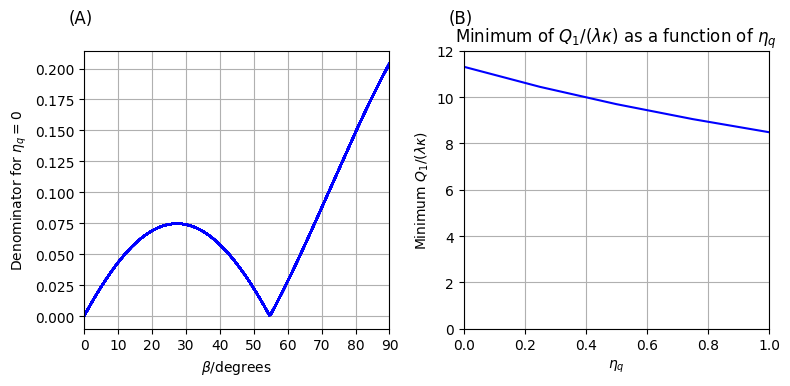

In [29]:
# Set the figure size to 8x4 inches
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

denominators_alpha0 = all_Denominators[0][:, 0]
# Plot the denominators as a function of beta in degrees for alpha = 0
axs[0].plot(beta_degrees, denominators_alpha0, color='blue')

# Add labels to the plot
axs[0].set_xlabel('$\\beta$/degrees')
axs[0].set_ylabel('Denominator for $\eta_q = 0$')
# Set the x-axis limits from 0 to 90 degrees
axs[0].set_xlim(0, 90)

# Set the tick mark interval on the x-axis as 10 degrees
axs[0].set_xticks(np.arange(0, 91, 10))

# Add grid lines
axs[0].grid(True)

# Set the x-axis limits from 0 to 90 degrees
axs[0].set_xlim(0, 90)

# Calculate the minimum Q value for each eta
min_Qs = [np.min(Q) for Q in all_Qs]

# Plot min_Qs as a function of eta_values
axs[1].plot(eta_values, min_Qs, color='blue')

# Set the x-axis limits to end at 1
axs[1].set_xlim(0, 1)

# Set the y-axis limits to start from zero
axs[1].set_ylim(0)

# Set the tick mark interval on the y-axis as 1
axs[1].set_yticks(np.arange(0, max(min_Qs)+2, 2))

# Add grid lines
axs[1].grid(True)

# Add labels to the plot
axs[1].set_xlabel('$\eta_q$')
axs[1].set_ylabel('Minimum $Q_1/(\lambda \kappa)$')

axs[0].text(-0.05, 1.1, "(A)",size=12,transform=axs[0].transAxes)

axs[1].text(-0.05, 1.1, "(B)",size=12,transform=axs[1].transAxes)

plt.tight_layout()
plt.savefig('Q1_min.pdf', bbox_inches='tight')
plt.show()